In [44]:
#filtracja
import scipy
from scipy import signal
import numpy as np
from math import sin, pi
import matplotlib.pyplot as plt

In [45]:
# różniczkowanie sygnału
def differentation(x):
    y = np.zeros(len(x)-2)

    for i in range(2, len(x)-2):
        y[i] = 1/8*(-x[i-1]-2*x[i-1]+2*x[i+1]+x[i+2])
    return y


In [46]:
# potęgowanie
def exponentation(x):
    y = [X**2 for X in x]
    return y

In [82]:
# całkowanie
def integration(x, N):
    y = np.zeros(len(x))
    
    for i in range(len(x)):
        suma = 0
        for j in range(N):
            if i-j >= 0:
                suma = suma + x[i-j]
        y[i] = suma
        
    y = [x/N for x in y]
    
    return y

In [48]:
from mat4py import loadmat

data = loadmat('ECG100.mat')
ECG_signal = data.get('ECG100')
ECG = [item for sublist in ECG_signal for item in sublist]



In [92]:
def pan_tompkins(ECG, fs, fc_h, fc_l, M, window, N):
    h = scipy.signal.firwin(M, [fc_l, fc_h], window=window, pass_zero=False, fs=fs)
    signal = scipy.signal.convolve(ECG, h, mode='same', method='auto')
    #signal = np.convolve(signal, h_dolno)
    #signal = np.convolve(signal, h_gorno)
    signal = differentation(signal)
    signal = exponentation(signal)
    signal = integration(signal, N)
    return signal

In [93]:
fs = 360
fc_h = 15
fc_l = 5
M = 50
N = 50
y = pan_tompkins(ECG, fs, fc_h, fc_l, M, 'hamming', N)
x = np.linspace(0, len(y)-1, len(y))

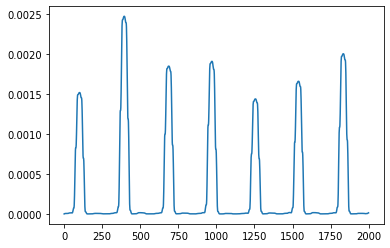

In [94]:
plt.plot(x[0:2000], y[0:2000])

(649998,)
649998


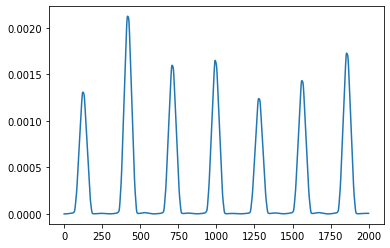

In [95]:
print(np.shape(y))
finish = integration(y, 50)
print(np.size(finish))
plt.plot(x[0:2000], finish[0:2000])